## Capstone

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Lectura de datos

In [11]:
ventas_df = pd.read_excel('BDD_Bodegas.xlsx', sheet_name='VENTAS')
proyeccion_df = pd.read_excel('BDD_Bodegas.xlsx', sheet_name='PROY 10 AÑOS')
bodegas_df = pd.read_excel('BDD_Bodegas.xlsx', sheet_name='BODEGAS')
comunas_df = pd.read_excel('BDD_Bodegas.xlsx', sheet_name='COMUNAS')
caso_base_df = pd.read_excel('tiempos_p_10_v_45_caso_base.xlsx')

### Limpieza y Preprocesamiento

In [6]:
## Limpieza
# Eliminar filas con valores faltantes
ventas_df.dropna(inplace=True)
ventas_df = ventas_df.drop_duplicates()

# Limpieza y preprocesamiento de la hoja 'PROY 10 AÑOS'
# Eliminar filas con valores faltantes
proyeccion_df.dropna(inplace=True)
proyeccion_df = proyeccion_df.drop_duplicates()

### Análisis de Ventas y Proyecciones a 10 años por Bodega (Cantidades vendidas por Bodega)

In [4]:
ventas_agrupadas = ventas_df.groupby('ID Bodega Despacho')['Cantidad'].sum()
proy_10_anos_agrupadas = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()

print('-'*100)
print(f'Cantidades vendidas por bodega HOY')
print(ventas_agrupadas)

print('-'*100)
print(f'Cantidades vendidas por bodegas en los PROXIMOS 10 AÑOS:')
print(proy_10_anos_agrupadas)

----------------------------------------------------------------------------------------------------
Cantidades vendidas por bodega HOY
ID Bodega Despacho
1     1.172112e+06
2     4.897608e+05
3     3.099986e+05
4     4.896189e+05
5     5.609508e+05
6     7.424203e+05
7     5.790037e+05
8     1.069308e+06
9     2.047032e+05
10    5.710755e+05
Name: Cantidad, dtype: float64
----------------------------------------------------------------------------------------------------
Cantidades vendidas por bodegas en los PROXIMOS 10 AÑOS:
ID Bodega Despacho
1     715591.018768
2     309332.306336
3     172644.156722
4     485242.258465
5     628082.243891
6     677239.364730
7     456102.734142
8     880368.695705
9     126379.967005
10    324772.019255
Name: Proyeccion 10 años, dtype: float64


### Calcular el total de demanda por comuna 

In [5]:
ventas_comuna = ventas_df.groupby('Comuna Despacho')['Cantidad'].sum()
print('-'*100)
print(f'Total de demanda por comuna:')
print(ventas_comuna)

----------------------------------------------------------------------------------------------------
Total de demanda por comuna:
Comuna Despacho
ALHUE              693.600000
ANDACOLLO         4063.566048
ANGOL            13992.261040
ANTOFAGASTA         59.895304
ANTUCO            1248.000000
                     ...     
VITACURA         75570.837024
YERBAS BUENAS    42419.918048
YUMBEL            2351.200000
YUNGAY           25212.819880
ZAPALLAR             3.200000
Name: Cantidad, Length: 228, dtype: float64


### Calcular el total de clientes asignados por bodega (Cantidades clientes por Bodega)

In [6]:
clientes_por_bodega = ventas_df.groupby('ID Bodega Despacho')['ID Cliente'].nunique()
print('-'*100)
print('Cantidad clientes por bodega:')
print(clientes_por_bodega)

----------------------------------------------------------------------------------------------------
Cantidad clientes por bodega:
ID Bodega Despacho
1     276
2     239
3     161
4     273
5     356
6     405
7     331
8     271
9     161
10    404
Name: ID Cliente, dtype: int64


### Clientes por bodega Proximos 10 años

In [7]:
clientes_por_bodega_proyeccion= proyeccion_df.groupby('ID Bodega Despacho')['ID Cliente'].nunique()
print('-'*100)
print('Cantidad clientes por bodega PROXIMOS 10 años:')
print(clientes_por_bodega_proyeccion)

----------------------------------------------------------------------------------------------------
Cantidad clientes por bodega PROXIMOS 10 años:
ID Bodega Despacho
1     223
2     191
3     125
4     216
5     283
6     309
7     262
8     220
9     125
10    317
Name: ID Cliente, dtype: int64


Comparación de Bodegas hoy y 10 años

<Figure size 1000x600 with 0 Axes>

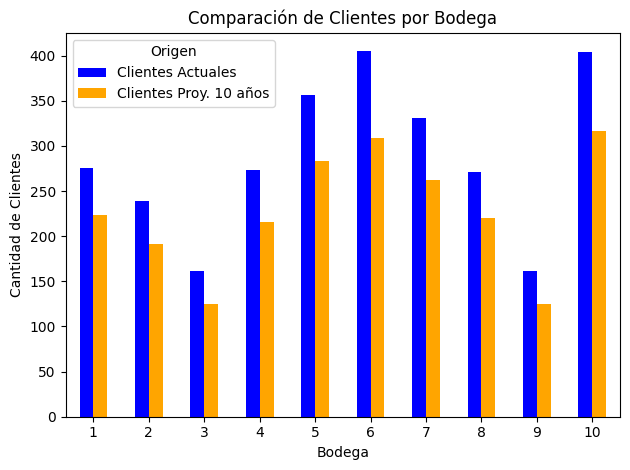

In [8]:
# Crear un DataFrame combinado
comparacion_df = pd.DataFrame({'Clientes Actuales': clientes_por_bodega, 'Clientes Proy. 10 años': clientes_por_bodega_proyeccion})

# Crear el histograma
plt.figure(figsize=(10, 6))
comparacion_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Comparación de Clientes por Bodega')
plt.xlabel('Bodega')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Origen', loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Cantidad total por cliente

In [9]:
cantidad_total_por_cliente = ventas_df.groupby('ID Cliente')['Cantidad'].sum()
print(cantidad_total_por_cliente)

ID Cliente
1        1728.164816
2         878.660744
3       12311.242240
4       70756.899376
5         418.653512
            ...     
3123       93.600000
3124        4.000000
3125       16.000000
3126       64.000000
3127      112.800000
Name: Cantidad, Length: 2877, dtype: float64


Visualización de Boxplot de demandas históricas por cliente 

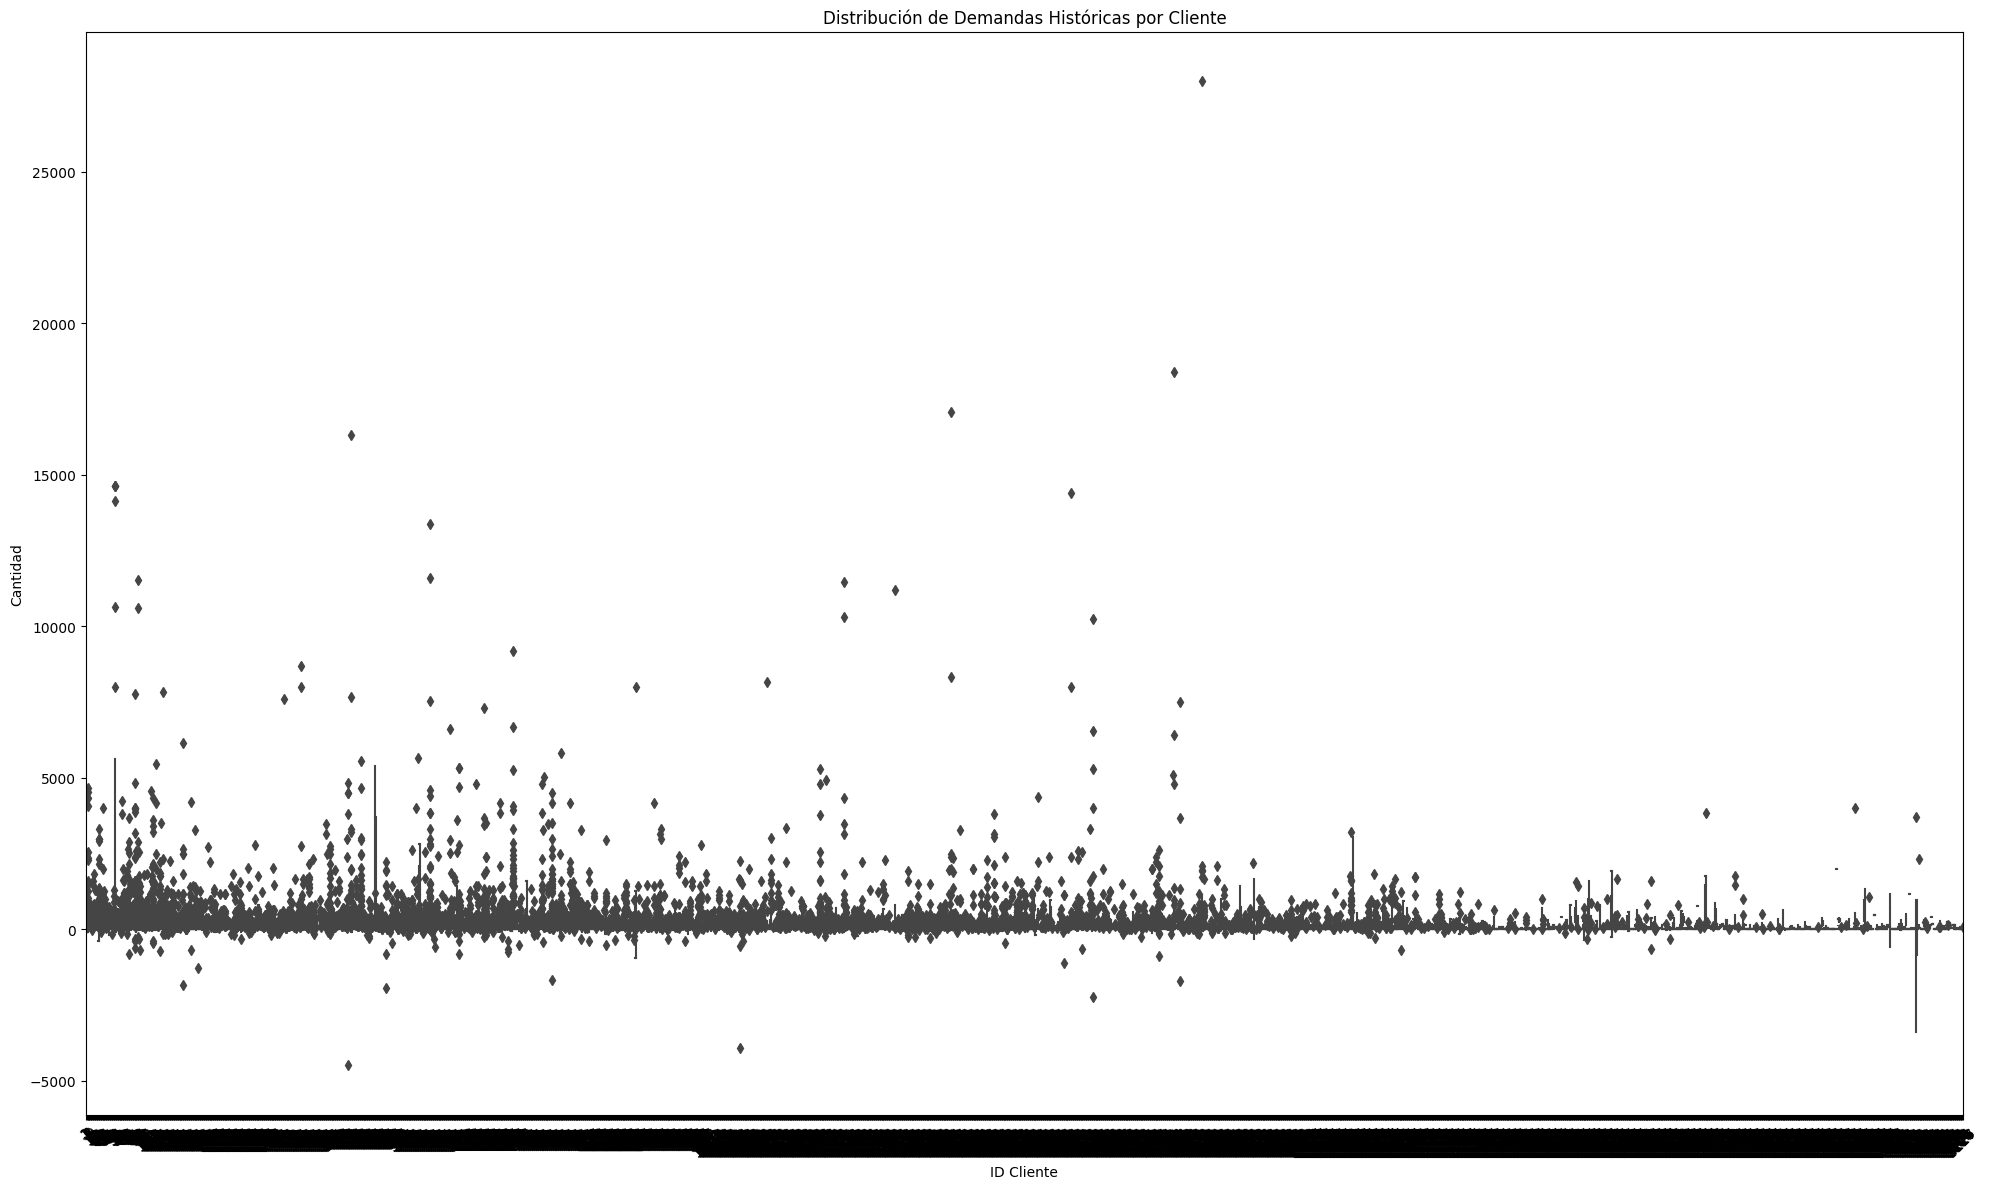

In [10]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='ID Cliente', y='Cantidad', data=ventas_df)
plt.title('Distribución de Demandas Históricas por Cliente')
plt.xlabel('ID Cliente')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

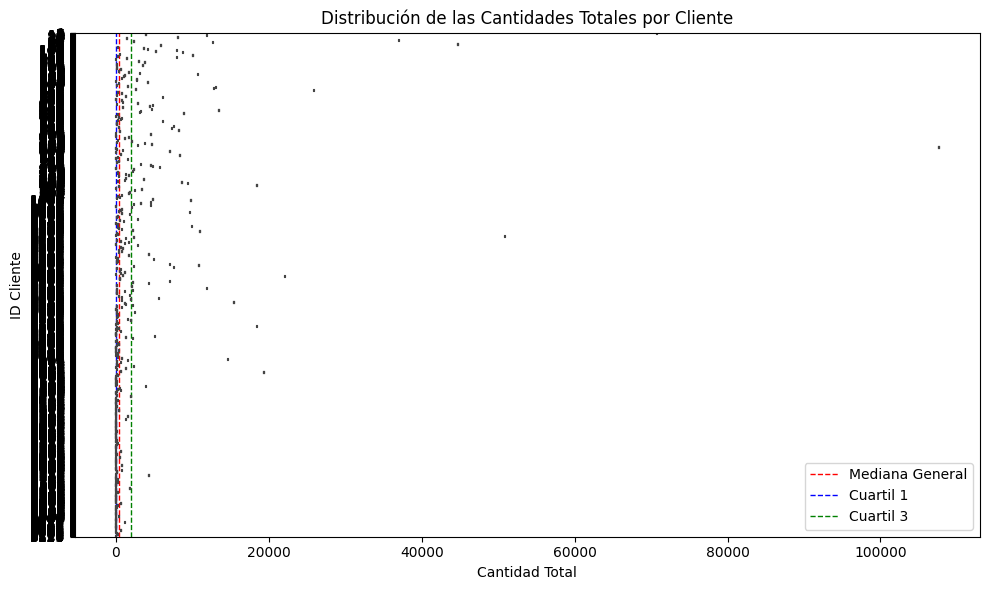

Mediana General de las Cantidades Totales: 393.509856
Cuartil 1 de las Cantidades Totales: 62.90576
Cuartil 3 de las Cantidades Totales: 1937.822856


In [11]:
# Calcular las cantidades totales por cliente
cantidades_totales = ventas_df.groupby('ID Cliente')['Cantidad'].sum()

# Calcular la mediana general de todas las cantidades totales
mediana_general = cantidades_totales.median()

# Calcular los cuartiles 1 y 3
cuartil_1 = cantidades_totales.quantile(0.25)
cuartil_3 = cantidades_totales.quantile(0.75)

# Crear el diagrama de cajas y bigotes horizontal para las cantidades totales por cliente
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=cantidades_totales.values, y=cantidades_totales.index, orient='h')
plt.axvline(mediana_general, color='r', linestyle='dashed', linewidth=1, label='Mediana General')
plt.axvline(cuartil_1, color='b', linestyle='dashed', linewidth=1, label='Cuartil 1')
plt.axvline(cuartil_3, color='g', linestyle='dashed', linewidth=1, label='Cuartil 3')
plt.title('Distribución de las Cantidades Totales por Cliente')
plt.xlabel('Cantidad Total')
plt.ylabel('ID Cliente')
plt.legend()
plt.tight_layout()

plt.show()

print("Mediana General de las Cantidades Totales:", mediana_general)
print("Cuartil 1 de las Cantidades Totales:", cuartil_1)
print("Cuartil 3 de las Cantidades Totales:", cuartil_3)

Visualizar puntos de bodegas y comunas

In [12]:
# import folium
# from folium.plugins import MarkerCluster

# # Cargar coordenadas de comunas desde el DataFrame 'COMUNAS'
# coordenadas_comunas = comunas_df.set_index('Comuna')[['LAT', 'LON']].to_dict(orient='index')

# # Crear un mapa centrado en una ubicación
# m = folium.Map(location=[-33.45, -70.65], zoom_start=10)  # Coordenadas correspondientes a Santiago, Chile

# # Agregar marcadores para las bodegas
# for index, row in bodegas_df.iterrows():
#     folium.Marker([row['LAT'], row['LONG']], popup=f'Bodega {row["ID Bodega"]}').add_to(m)

# # Crear un grupo de marcadores para la demanda de los clientes
# demand_cluster = MarkerCluster().add_to(m)

# # Agregar marcadores para la demanda de los clientes y sus coordenadas de la hoja COMUNAS
# for index, row in ventas_df.iterrows():
#     comuna = row['Comuna Despacho']
#     coordenadas = coordenadas_comunas.get(comuna)
#     if coordenadas:
#         folium.CircleMarker([coordenadas['LAT'], coordenadas['LON']],
#                             radius=row['Cantidad'] * 0.1,  # Ajusta el radio según la demanda
#                             color='blue',
#                             fill=True,
#                             fill_color='blue',
#                             fill_opacity=0.6,
#                             popup=f'Demanda: {row["Cantidad"]}').add_to(demand_cluster)

# # Guardar el mapa en un archivo HTML
# m.save('mapa_demandas.html')

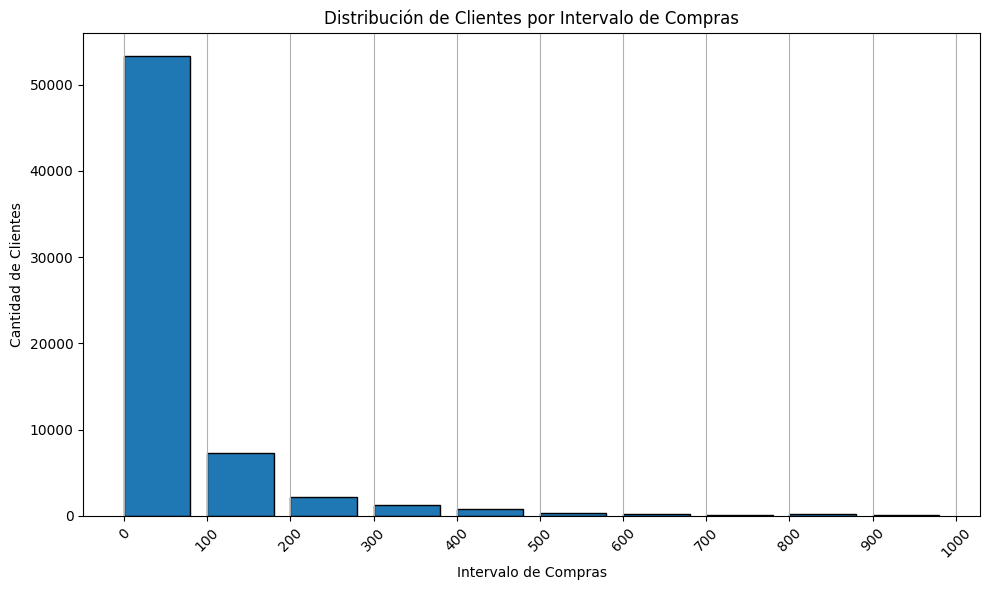

107632.720832
2151.1824224298744
393.509856


In [13]:
# Definir los límites de los intervalos
intervals = [i * 100 for i in range(int(cantidad_total_por_cliente.max() / 10000) + 1)]

# Calcular la cantidad de clientes en cada intervalo
clientes_por_intervalo = [((ventas_df['Cantidad'] >= intervals[i]) &
                           (ventas_df['Cantidad'] < intervals[i + 1])).sum()
                          for i in range(len(intervals) - 1)]

# # Crear el histograma
# plt.figure(figsize=(10, 6))
# plt.bar(intervals[:-1], clientes_por_intervalo, width=100)
# plt.title('Distribución de Clientes por Intervalo de Compras')
# plt.xlabel('Intervalo de Compras')
# plt.ylabel('Cantidad de Clientes')
# plt.tight_layout()

# plt.show()
# Crear el histograma con barras más delgadas
plt.figure(figsize=(10, 6))
plt.bar(intervals[:-1], clientes_por_intervalo, width=80, align='edge', edgecolor='black')
plt.title('Distribución de Clientes por Intervalo de Compras')
plt.xlabel('Intervalo de Compras')
plt.ylabel('Cantidad de Clientes')

# Configurar ticks en el eje x
plt.xticks(intervals, rotation=45)
plt.gca().xaxis.grid(True)

plt.tight_layout()
plt.show()
print(cantidad_total_por_cliente.max())
print(cantidad_total_por_cliente.mean())
print(cantidad_total_por_cliente.median())

## Categorización

In [7]:
# Calcular las cantidades totales por cliente
cantidades_totales = ventas_df.groupby('ID Cliente')['Cantidad'].sum()
cantidades_totales = cantidades_totales.sort_values()

In [8]:
# Crear la columna 'Suma Acumulada' que contendrá la suma acumulada de 'Cantidad' por cliente
cantidades_acumuladas = cantidades_totales.cumsum()

In [76]:
# Calcular los cuartiles
umbral_silver = cantidades_totales.sum()*0.25
umbral_premium = cantidades_totales.sum()*0.75

ventas_df['Categoria'] = 'Silver'  # Inicialmente, establecer a 'Silver' para todos
clientes_con_menos_umbral_silver = cantidades_acumuladas[cantidades_acumuladas <= umbral_silver]
clientes_con_entre_medio = cantidades_acumuladas[(cantidades_acumuladas > umbral_silver) & (cantidades_acumuladas <= umbral_premium)]
clientes_con_sobre_umbral_premium = cantidades_acumuladas[umbral_premium < cantidades_acumuladas]

# # Actualizar la columna 'Categoria' según las condiciones
ventas_df.loc[ventas_df['ID Cliente'].isin(clientes_con_entre_medio.index), 'Categoria'] = 'Gold'
ventas_df.loc[ventas_df['ID Cliente'].isin(clientes_con_sobre_umbral_premium.index), 'Categoria'] = 'Premium'

# # Contar la cantidad de cada categoría en la columna 'Categoria'
cantidad_por_categoria = ventas_df['Categoria'].value_counts()

print(cantidad_por_categoria)
print("-"*100)
print("Clientes bajo el 25% del total: ",clientes_con_menos_umbral_silver.count())
print("Clientes entre medio: ",clientes_con_entre_medio.count())
print("Clientes sobre el 75% del total: ",clientes_con_sobre_umbral_premium.count())
print("Suma de clientes: ",clientes_con_menos_umbral_silver.count()+clientes_con_entre_medio.count()+
      clientes_con_sobre_umbral_premium.count())
print('-'*100)
print("Clientes sgn df: ", ventas_df['ID Cliente'].nunique())

Gold       31458
Silver     28300
Premium     6368
Name: Categoria, dtype: int64
----------------------------------------------------------------------------------------------------
Clientes bajo el 25% del total:  2401
Clientes entre medio:  421
Clientes sobre el 75% del total:  34
Suma de clientes:  2856
----------------------------------------------------------------------------------------------------
Clientes sgn df:  2856


In [83]:
print(ventas_df)
# Guardar el DataFrame modificado en el archivo Excel
ventas_df.to_excel('BDD_Bodegas.xlsx', sheet_name='VENTAS', index=False)

print("Nueva columna agregada a la hoja 'VENTAS' en 'BDD_Bodegas.xlsx'")


           Fecha  ID Cliente Comuna Despacho   Cantidad  ID Bodega Despacho  \
0     2017-01-03          66        PLACILLA   8.506328                   7   
1     2017-01-03          79        RANCAGUA  12.904384                   3   
2     2017-01-03         105      SANTA CRUZ  33.185976                   7   
3     2017-01-03         145        SANTIAGO  16.350640                   8   
4     2017-01-03         225         CHILLAN   3.746632                  10   
...          ...         ...             ...        ...                 ...   
66121 2022-09-21        2309         LONGAVI  16.000000                   5   
66122 2022-09-21        2589         DONIHUE  16.000000                   8   
66123 2022-09-21        2603         MACHALI  23.200000                   8   
66124 2022-09-21        2732           PINTO  20.000000                  10   
66125 2022-09-21        3047        COQUIMBO  20.000000                   1   

      Categoria  
0        Silver  
1        Silver

### Histograma que indica la cantidad de clientes Silver, Gold y Premium hay POR BODEGA

<Figure size 1000x600 with 0 Axes>

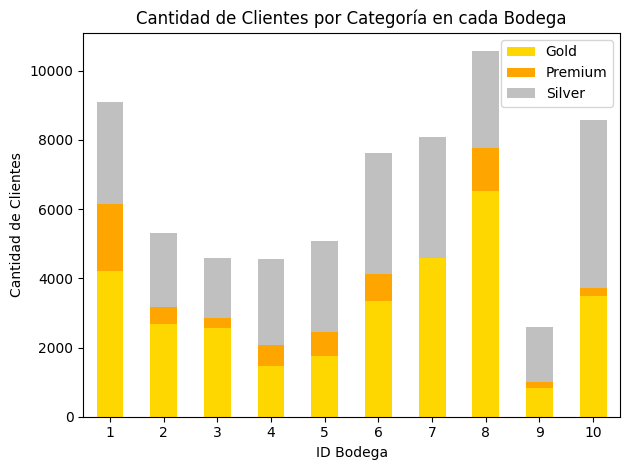

In [84]:

# Crear un DataFrame que tenga las categorías como columnas y bodegas como índice
clientes_por_bodega_categoria = ventas_df.groupby(['ID Bodega Despacho', 'Categoria'])['ID Cliente'].count().unstack()

# Rellenar con ceros los valores NaN
clientes_por_bodega_categoria = clientes_por_bodega_categoria.fillna(0).astype(int)

# Crear el histograma
plt.figure(figsize=(10, 6))
clientes_por_bodega_categoria.plot(kind='bar', stacked=True, color=['gold', 'orange', 'silver'])
plt.title('Cantidad de Clientes por Categoría en cada Bodega')
plt.xlabel('ID Bodega')
plt.ylabel('Cantidad de Clientes')
plt.legend(bbox_to_anchor=(1, 1), loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

### Movimiento de Bodega durante los años 2017 - 2022

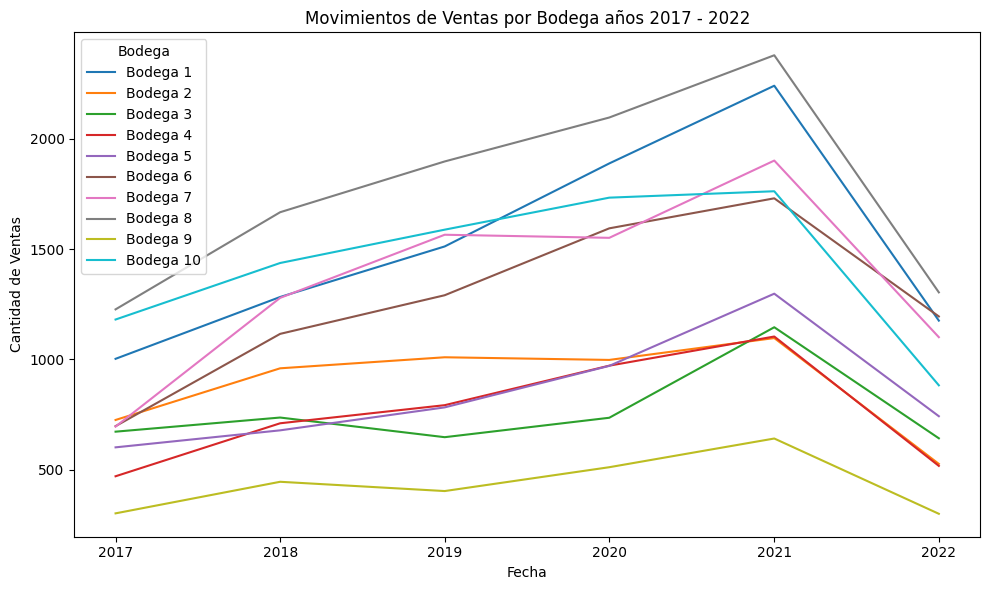

In [85]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])
# Crear un DataFrame que contenga las fechas, bodegas y cantidades por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.to_period('Y'), 'ID Bodega Despacho'])['ID Cliente'].count().unstack()

# Crear el gráfico de línea para cada bodega
plt.figure(figsize=(10, 6))
for bodega in movimientos_bodegas.columns:
    plt.plot(movimientos_bodegas.index.to_timestamp(), movimientos_bodegas[bodega], label=f'Bodega {bodega}')

plt.title('Movimientos de Ventas por Bodega años 2017 - 2022')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Bodega')
plt.tight_layout()

plt.show()

### Histogramas Demanda promedio por año 

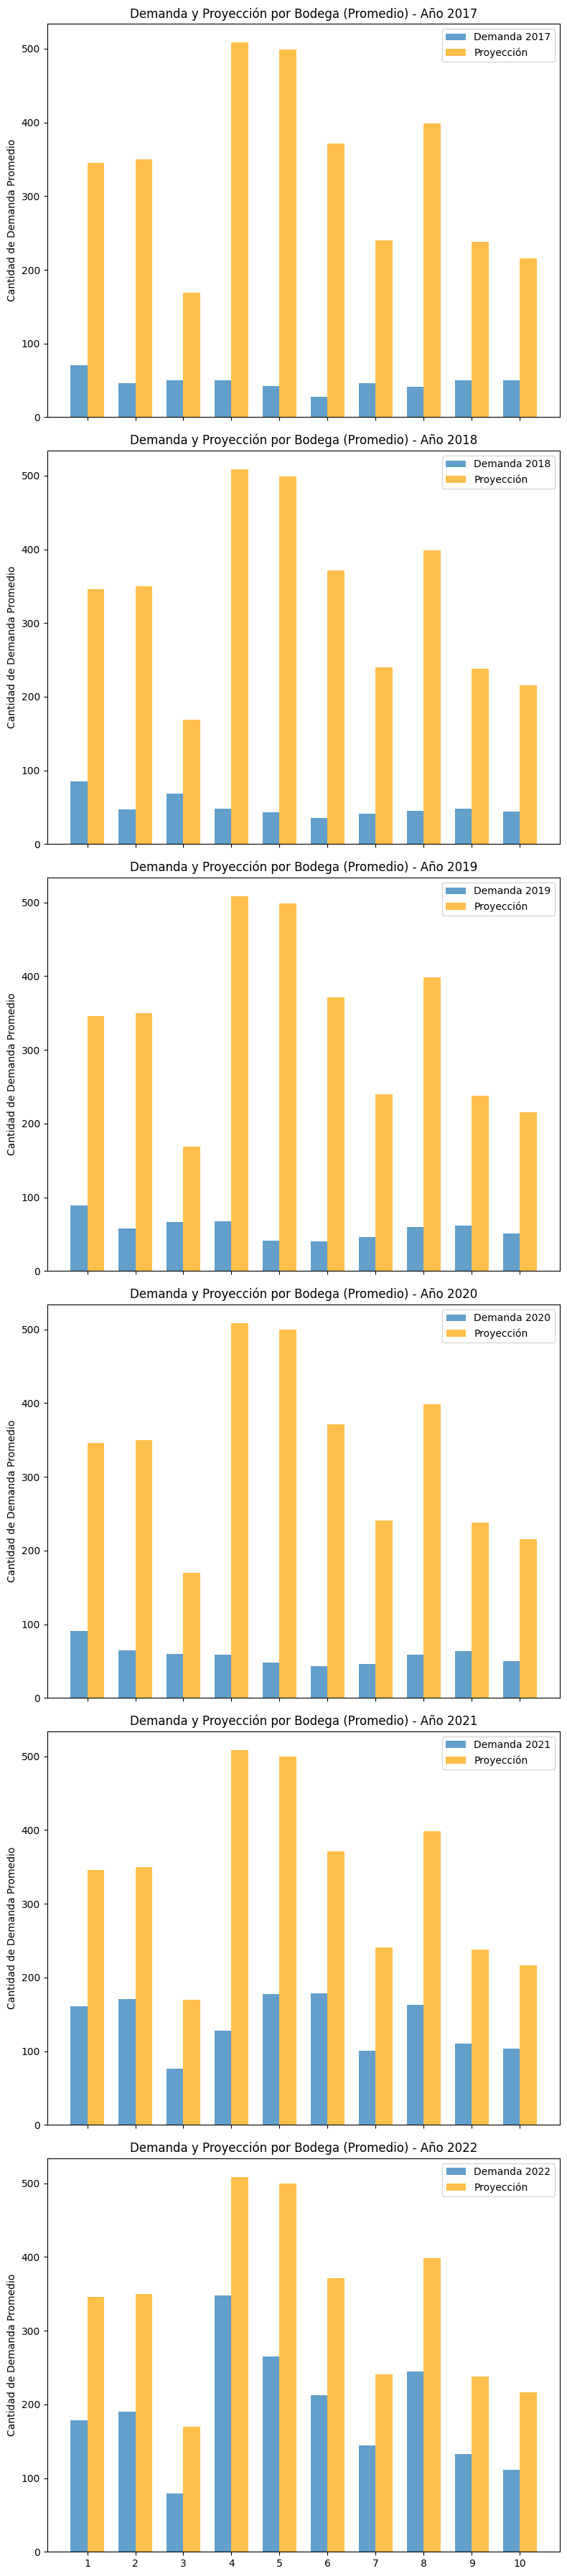

In [39]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])

# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].mean().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].mean()
# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Crear subplots para mostrar histogramas distintos por año
fig, axs = plt.subplots(len(años_disponibles), 1, figsize=(8, 6 * len(años_disponibles)), sharex=True)

# Ancho de cada barra
bar_width = 0.35

for i, año in enumerate(años_disponibles):
    demanda_por_año = movimientos_bodegas.loc[año]
    proyeccion_por_año = proyecciones
    proyeccion_por_año.index = [f"Proyección Bodega {b}" for b in proyeccion_por_año.index]
    
    # Posiciones de las barras
    posiciones_demanda = np.arange(len(demanda_por_año))
    posiciones_proyeccion = posiciones_demanda + bar_width
    
    axs[i].bar(posiciones_demanda, demanda_por_año, bar_width, label=f'Demanda {año}', alpha=0.7)
    axs[i].bar(posiciones_proyeccion, proyeccion_por_año, bar_width, color='orange', label='Proyección', alpha=0.7)
    
    axs[i].set_title(f'Demanda y Proyección por Bodega (Promedio) - Año {año}')
    axs[i].set_ylabel('Cantidad de Demanda Promedio')
    axs[i].set_xticks(posiciones_demanda + bar_width / 2)
    axs[i].set_xticklabels(demanda_por_año.index)
    axs[i].legend()

plt.tight_layout()
plt.show()

### Histograma Demanda Total vs Proyección por bodega

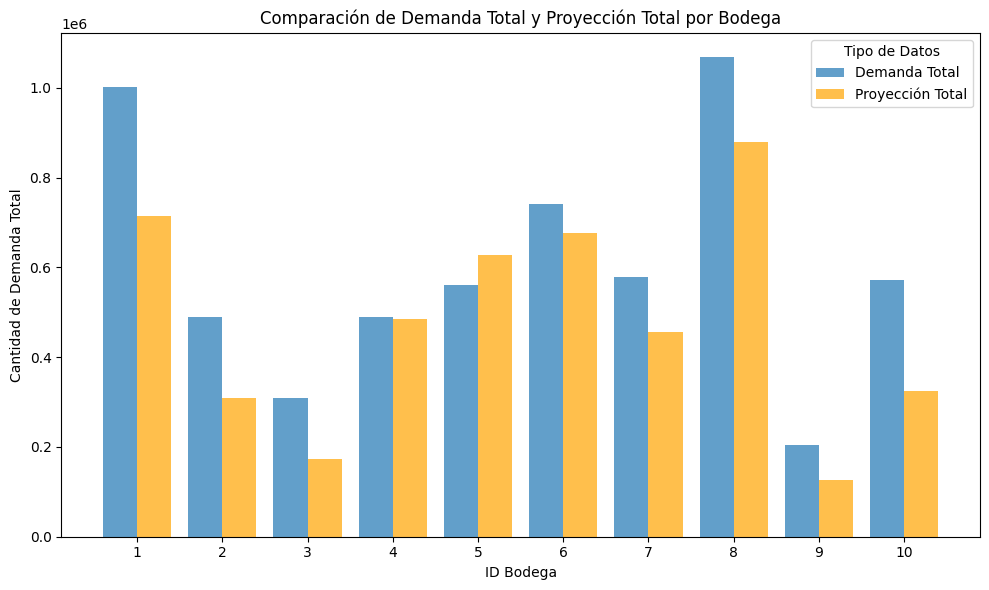

In [86]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])

# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].sum().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()
# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Ancho de cada barra
bar_width = 0.4

# Posiciones de las barras
posiciones = np.arange(len(movimientos_bodegas.columns))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

demanda_total = None
proyeccion_total = proyecciones

for i, año in enumerate(años_disponibles):
    if 2017 <= año <= 2022:
        if demanda_total is None:
            demanda_total = movimientos_bodegas.loc[año]
        else:
            demanda_total += movimientos_bodegas.loc[año]

plt.bar(posiciones, demanda_total, bar_width, label='Demanda Total', alpha=0.7)
plt.bar(posiciones + bar_width, proyeccion_total, bar_width, color='orange', label='Proyección Total', alpha=0.7)

plt.title('Comparación de Demanda Total y Proyección Total por Bodega')
plt.xlabel('ID Bodega')
plt.ylabel('Cantidad de Demanda Total')
plt.xticks(posiciones + bar_width / 2, demanda_total.index)
plt.legend(title='Tipo de Datos')

plt.tight_layout()
plt.show()

### Histogramas Demanda Promedio Total vs Proyeccion promedio por bodega

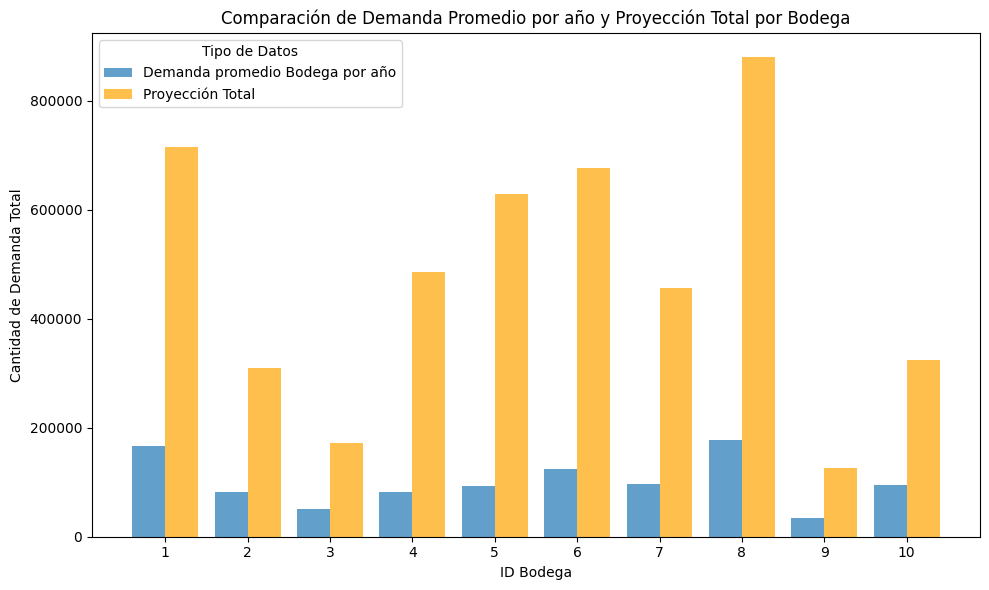

In [87]:
ventas_df['Fecha'] = pd.to_datetime(ventas_df['Fecha'])

# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].sum().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()
# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Ancho de cada barra
bar_width = 0.4

# Posiciones de las barras
posiciones = np.arange(len(movimientos_bodegas.columns))

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

demanda_total = None
proyeccion_total = proyecciones

for i, año in enumerate(años_disponibles):
    
    if 2017 <= año <= 2022:
        if demanda_total is None:
            demanda_total = movimientos_bodegas.loc[año]
        else:
            demanda_total += movimientos_bodegas.loc[año]

demanda_total = demanda_total/6
plt.bar(posiciones, demanda_total, bar_width, label='Demanda promedio Bodega por año', alpha=0.7)
plt.bar(posiciones + bar_width, proyeccion_total, bar_width, color='orange', label='Proyección Total', alpha=0.7)

plt.title('Comparación de Demanda Promedio por año y Proyección Total por Bodega')
plt.xlabel('ID Bodega')
plt.ylabel('Cantidad de Demanda Total')
plt.xticks(posiciones + bar_width / 2, demanda_total.index)
plt.legend(title='Tipo de Datos')

plt.tight_layout()
plt.show()

### Gráfico Demanda total del año vs Año

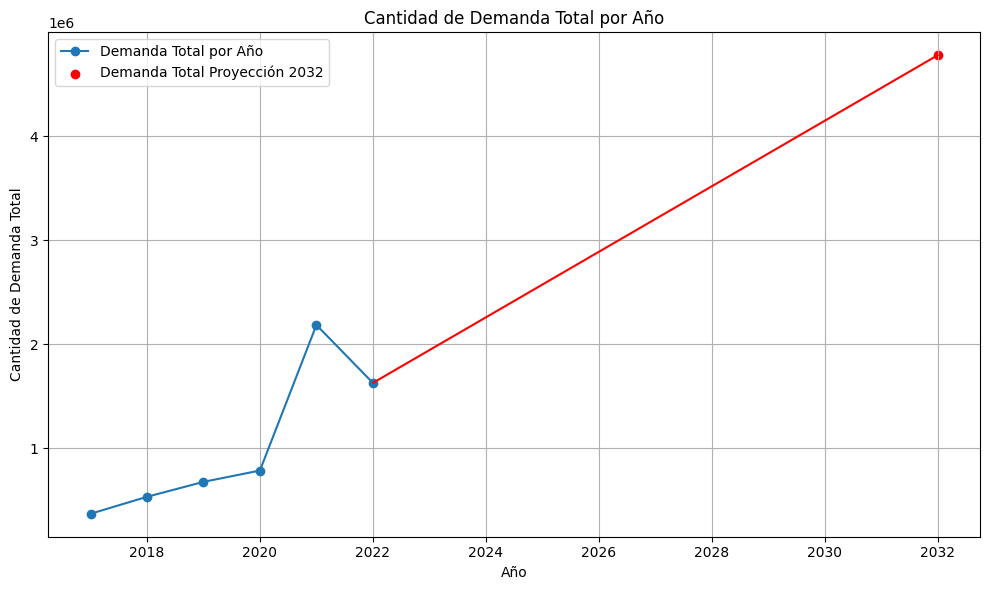

In [36]:
# Crear un DataFrame que contenga las fechas, bodegas y demandas por fecha
movimientos_bodegas = ventas_df.groupby([ventas_df['Fecha'].dt.year, 'ID Bodega Despacho'])['Cantidad'].sum().unstack()

# Obtener las proyecciones de ventas de 10 años por bodega
proyecciones = proyeccion_df.groupby('ID Bodega Despacho')['Proyeccion 10 años'].sum()

# Obtener los años disponibles en el DataFrame movimientos_bodegas
años_disponibles = movimientos_bodegas.index

# Calcular la suma de la demanda por año
demanda_total_por_año = movimientos_bodegas.sum(axis=1)

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))

plt.plot(años_disponibles, demanda_total_por_año, marker='o', label='Demanda Total por Año')

# Agregar un punto adicional
año_adicional = 2032
demanda_adicional = proyecciones.sum()  # Ajusta el valor según tu necesidad


# Verificar si el año adicional está en años_disponibles
if año_adicional not in años_disponibles:
    plt.scatter(año_adicional, demanda_adicional, color='red', label='Demanda Total Proyección 2032')
    ultimo_año = años_disponibles[-1]
    plt.plot([año_adicional, años_disponibles[-1]], [demanda_adicional, demanda_total_por_año.loc[ultimo_año]], color='red')

plt.title('Cantidad de Demanda Total por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Demanda Total')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


## Verificando las comunas disponibles y los ids clientes

In [20]:
# Obtener una lista de las comunas presentes en comunas_df
comunas_disponibles = comunas_df['Comuna'].unique()

# Filtrar las filas en ventas_df donde la 'Comuna Despacho' no está en comunas_disponibles
clientes_sin_comuna_asignada = ventas_df[~ventas_df['Comuna Despacho'].isin(comunas_disponibles)]

print(clientes_sin_comuna_asignada['ID Cliente'].unique())
print(clientes_sin_comuna_asignada['Comuna Despacho'].unique())

### PUEBLO HUNDIDO: no está en comunas_df (ID Cliente: 139)
### COIHAIQUE: sí está, pero esta escrito distinto en comunas_df (tiene i minúscula) (ID Cliente: 2231)
### POLPAICO: no está en comunas_df (ID Cliente: 745, pide en dos comunas Las Condes y POLPAICO)
### LONTUE: no está en comunas_df (ID Cliente: 111, pide en dos comunas Las Condes y LONTUE)
### VILLA PRAT: no está en comunas_df (ID Cliente: 2922)

[ 139 2231  745  111 2922]
['PUEBLO HUNDIDO' 'COIHAIQUE' 'POLPAICO' 'LONTUE' 'VILLA PRAT']


In [21]:
# Agrupar por 'ID Cliente' y contar las comunas únicas asociadas
conteo_comunas_por_cliente = ventas_df.groupby('ID Cliente')['Comuna Despacho'].nunique()

# Filtrar los IDs de clientes que tienen exactamente 2 comunas únicas
ids_con_dos_comunas = conteo_comunas_por_cliente[conteo_comunas_por_cliente == 2]
print(ids_con_dos_comunas)

ID Cliente
13      2
29      2
39      2
58      2
87      2
       ..
2268    2
2270    2
2509    2
2652    2
2786    2
Name: Comuna Despacho, Length: 88, dtype: int64


## Gráfico de Distribución acumulada

In [98]:
cantidades_totales = ventas_df.groupby('ID Cliente')['Cantidad'].sum()
cantidades_totales = cantidades_totales.sort_values(ascending=False)
cantidades_acumuladas = cantidades_totales.cumsum()
cantidad_clientes = list(range(1, len(cantidades_totales) + 1))

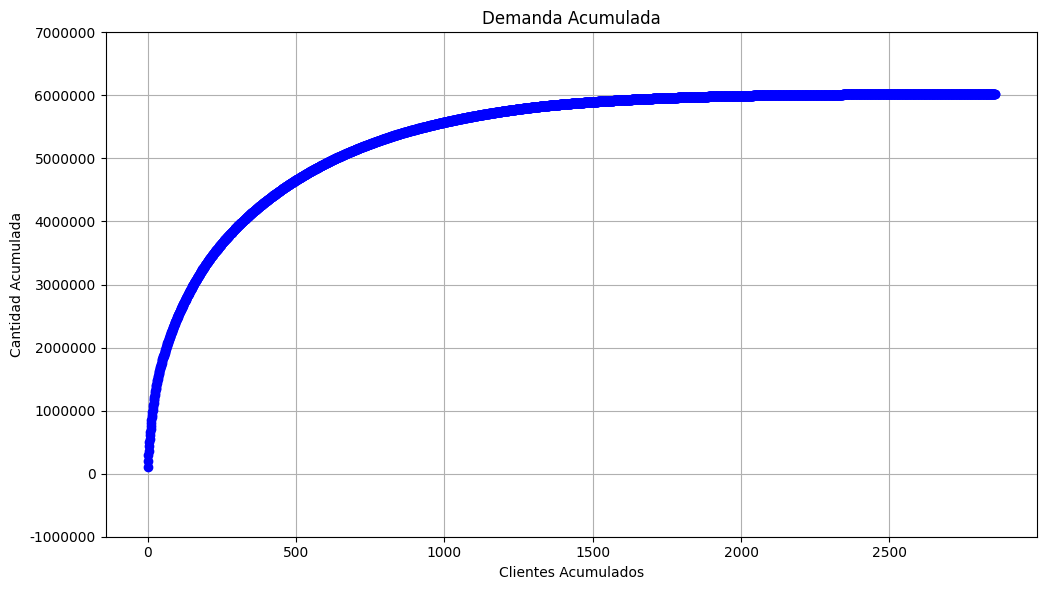

In [106]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(cantidad_clientes, cantidades_acumuladas, marker='o', linestyle='-', color='b')
plt.title('Demanda Acumulada')
plt.xlabel('Clientes Acumulados')
plt.ylabel('Cantidad Acumulada')
plt.grid(True)
plt.tight_layout()

# Configurar las etiquetas del eje Y con valores numéricos
plt.yticks(plt.yticks()[0], ['{:.0f}'.format(y) for y in plt.yticks()[0]])

plt.show()

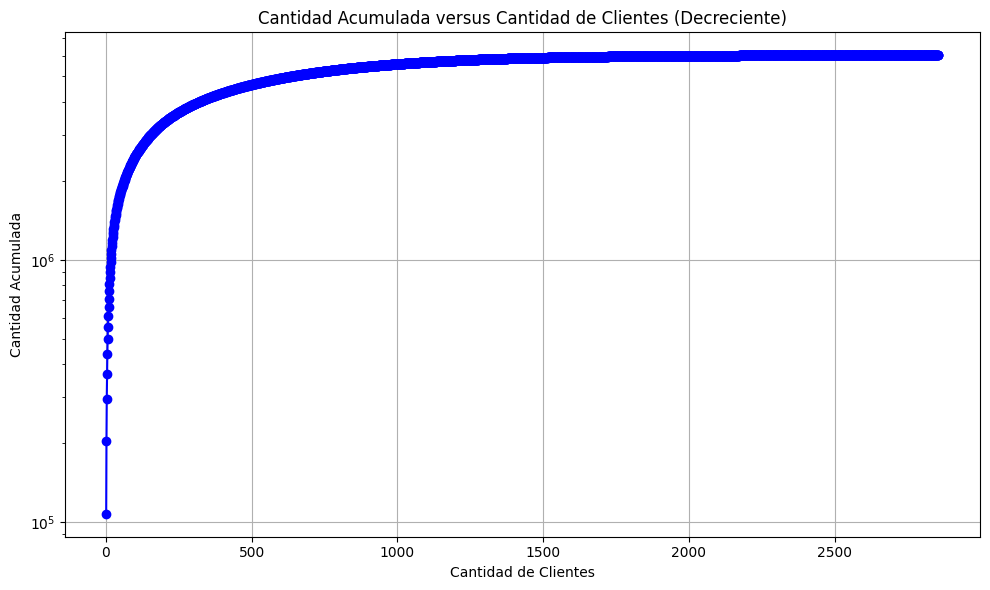

In [107]:
# Ordenar los datos por cantidad acumulada en orden descendente
cantidades_totales_sorted = cantidades_totales.sort_values(ascending=False)
cantidades_acumuladas_sorted = cantidades_acumuladas.loc[cantidades_totales_sorted.index]

# Crear una lista de la cantidad de clientes (números de índice)
cantidad_clientes = list(range(1, len(cantidades_totales_sorted) + 1))

# Crear el gráfico con escala logarítmica en el eje Y
plt.figure(figsize=(10, 6))
plt.semilogy(cantidad_clientes, cantidades_acumuladas_sorted, marker='o', linestyle='-', color='b')
plt.title('Cantidad Acumulada versus Cantidad de Clientes')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Cantidad Acumulada')
plt.grid(True)
plt.tight_layout()

plt.show()

In [9]:
## Leer BDD Categorizada
bdd_categorizada_df = pd.read_excel('BDD_Bodegas_Categorizada.xlsx')

In [19]:
# Iterar a través de los IDs de cliente en caso_base_df
for id_cliente in caso_base_df['ID Cliente']:
    # Buscar el valor de la columna 'Categoria' en bdd_categorizada
    categoria = bdd_categorizada_df[bdd_categorizada_df['ID Cliente'] == id_cliente]['Categoria'].values
    
    # Verificar si se encontró una categoría para el ID de cliente
    if len(categoria) > 0:
        # Asignar la categoría encontrada a la columna 'Tiempo maximo' en caso_base_df
        caso_base_df.loc[caso_base_df['ID Cliente'] == id_cliente, 'Categoria'] = categoria[0]


In [26]:
# Define las condiciones y valores para cambiar
condiciones = [
    caso_base_df['Categoria'] == 'Silver',
    caso_base_df['Categoria'] == 'Gold',
    caso_base_df['Categoria'] == 'Premium'
]
valores = [48, 24, 12]

# Aplica las condiciones y cambia los valores en la columna 'Tiempo maximo'
caso_base_df['Tiempo maximo'] = np.select(condiciones, valores, default=caso_base_df['Tiempo maximo'])

# Mostrar el DataFrame actualizado
print(caso_base_df)

      ID Cliente    Tiempo Tiempo maximo Categoria
0              1  0.000222            48    Silver
1            175  0.000222            48    Silver
2            178  0.000222            48    Silver
3            184  0.000222            48    Silver
4            185  0.000222            24      Gold
...          ...       ...           ...       ...
2844        2985  8.677333            48    Silver
2845        2997  2.921111            48    Silver
2846        3011  1.712889            48    Silver
2847        3097  2.544444            48    Silver
2848        3110  3.294889            48    Silver

[2849 rows x 4 columns]


In [29]:
# Define una función para aplicar la lógica de la columna 'Cumple'
def cumple_condicion(row):
    if row['Tiempo'] <= row['Tiempo maximo']:
        return 1
    else:
        return 0

# Aplica la función a lo largo de las filas del DataFrame
caso_base_df['Cumple'] = caso_base_df.apply(cumple_condicion, axis=1)

# Mostrar el DataFrame con la nueva columna
print(caso_base_df)

      ID Cliente    Tiempo Tiempo maximo Categoria  Cumple
0              1  0.000222            48    Silver       1
1            175  0.000222            48    Silver       1
2            178  0.000222            48    Silver       1
3            184  0.000222            48    Silver       1
4            185  0.000222            24      Gold       1
...          ...       ...           ...       ...     ...
2844        2985  8.677333            48    Silver       1
2845        2997  2.921111            48    Silver       1
2846        3011  1.712889            48    Silver       1
2847        3097  2.544444            48    Silver       1
2848        3110  3.294889            48    Silver       1

[2849 rows x 5 columns]


In [30]:
# Especifica el nombre del archivo Excel en el que deseas guardar el DataFrame
nombre_archivo = 'Caso_Base_Juntado.xlsx'

# Guarda el DataFrame en un archivo Excel
caso_base_df.to_excel(nombre_archivo, index=False)  # El argumento index=False evita que se incluya el índice en el archivo

print(f"DataFrame guardado en {nombre_archivo}")

DataFrame guardado en Caso_Base_Juntado.xlsx
